# 1. 

# A. Assume in 1 day the average cosmic-ray background is 7, and the average number of gamma-rays emitted by your hypothetical source is 10.

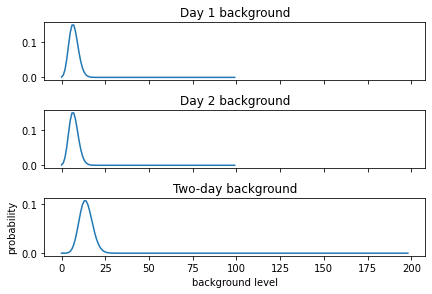

In [1]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy import signal

bg=7
x=range(100)
p1=poisson.pmf(x,bg)
p2=poisson.pmf(x,bg)
twoday= signal.convolve(p1, p2) 
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(p1)
ax_orig.set_title('Day 1 background')

ax_win.plot(p2)
ax_win.set_title('Day 2 background')

ax_filt.plot(twoday)
ax_filt.set_title('Two-day background')

fig.tight_layout()
plt.xlabel('background level')
plt.ylabel('probability')
fig.show()

The two-day background has a different mean from the single-day backgrounds. 

# B. Convolve a five-day background

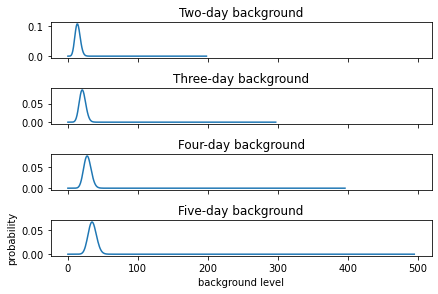

In [7]:
threeday= signal.convolve(twoday, p1) 
fourday= signal.convolve(threeday, p1) 
fiveday= signal.convolve(fourday, p1) 
fig, (ax_2, ax_3, ax_4,ax_5) = plt.subplots(4, 1, sharex=True)
ax_2.plot(twoday)
ax_2.set_title('Two-day background')

ax_3.plot(threeday)
ax_3.set_title('Three-day background')

ax_4.plot(fourday)
ax_4.set_title('Four-day background')

ax_5.plot(fiveday)
ax_5.set_title('Five-day background')

fig.tight_layout()
plt.xlabel('background level')
plt.ylabel('probability')
fig.show()

The convolution of the Poisson distributions also appear to be a Poisson distribution. It makes sense because the convonlution of two Poissons describes the overlap between them. Since Poisson distributions are symmetric around their mean, the overlap between two Poisson distributions up to a shift should also be a Poisson distribution. 

# C. Probability distribution evolve as you average days

The following plot overlays the background of one day to five days

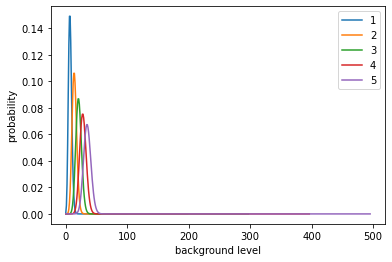

In [8]:
fig,ax = plt.subplots(1, 1, sharex=True)
ax.plot(p1)
ax.plot(twoday)
ax.plot(threeday)
ax.plot(fourday)
ax.plot(fiveday)
plt.xlabel('background level')
plt.ylabel('probability')
plt.legend("12345")
fig.show()


As more Poisson distributions are convolved together, the mean of the distribution shifts towards the positive x axis, because the convolution is "summing" two Poissions and stretching the x axis. The peak probability decreases because the total probability should always sums to 1 but the x axis has been stretched, so each x shall correspond to a smaller probability. While the form of the convolution remains a Poisson, it appears more spread out and approches a Gaussian, which confirms the central limit theorem. 

# D. Pick some number of days 12, and assume you saw Y=10*12=120 gamma rays from your source. Calculate the 'sigma' of your observation.

1. Find pdf() of background by convolving 12 Poissons

Text(0, 0.5, 'probability')

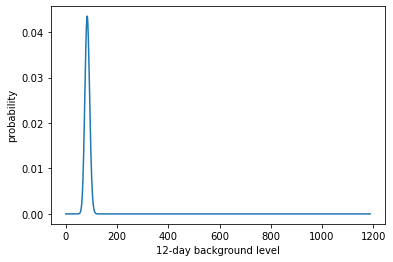

In [9]:
# the following function takes the an array "a" and the number of times "n" 
# to convolve with itself, and produce the array a convolved by n times 
def selfconvolve(a, n):
    abyn=[1]
    for i in range(n):
        abyn=signal.convolve(abyn, a) 
    return abyn

bg12=selfconvolve(p1, 12)
fig,ax = plt.subplots(1, 1, sharex=True)
ax.plot(bg12)
plt.xlabel('12-day background level')
plt.ylabel('probability')

2. Integrate the pdf()

The probablity that the background produces a signal of 120 is $$P(120)=\int_{x=120}^{\infty}pdf(x)dx$$

Since the pdf(x) for a 12-day distribution is discrete, we find the probability by summing from the 120th element to the total element of the bg12 array: $$P(120)=\sum_{x=120}^{\infty}bg12(x)$$

In [10]:
p120=sum(bg12[x] for x in range(120, len(bg12)))
print(p120)

0.00012768692046836574


3. Convert probability to sigma

In [11]:
from scipy.stats import norm
from scipy import stats
stats.norm.ppf(p120, loc=0, scale=1)

-3.656809682693587

The "sigma" of the observation is therefore 3.6568

# Problem 2 Pick Rayleigh Distribution

# A. Show how the distribution changes as you average over more observing intervals

Text(0, 0.5, 'probability')

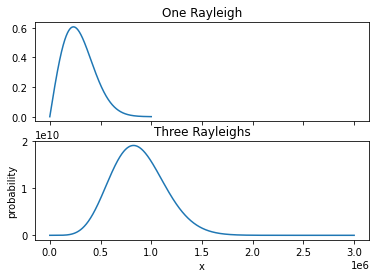

In [41]:
from scipy.stats import rayleigh
import numpy as np
from numpy import random

x = np.linspace(rayleigh.ppf(0), rayleigh.ppf(0.9999), 1000000)
r = rayleigh.pdf(x, 0, 1)
rrr=selfconvolve(r, 3)
fig, (axr,axrrr) = plt.subplots(2, 1, sharex=True)
axr.plot(r)
axr.set_title('One Rayleigh')
axrrr.plot(rrr)
axrrr.set_title('Three Rayleighs')
plt.xlabel('x')
plt.ylabel('probability')

As the number of Rayleigh distribution increases from one to three, the peak shifts towards the positive x axis and the shape becomes more spread out.

# B. Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

The shape of more Rayleigh distributions convolved together approaches a Gaussian when it's convolved with itself once. 

Text(0, 0.5, 'probability')

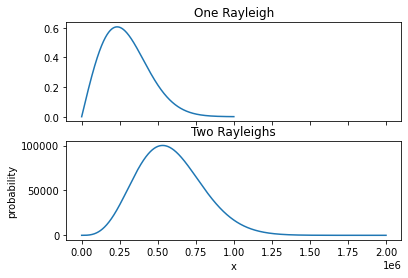

In [43]:
x = np.linspace(rayleigh.ppf(0), rayleigh.ppf(0.9999), 1000000)
r = rayleigh.pdf(x, 0, 1)
rrr=selfconvolve(r, 2)
fig, (axr,axrrr) = plt.subplots(2, 1, sharex=True)
axr.plot(r)
axr.set_title('One Rayleigh')
axrrr.plot(rrr)
axrrr.set_title('Two Rayleighs')
plt.xlabel('x')
plt.ylabel('probability')

# 3. Version 1 

# A. From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X=5. Assuming you see a signal of strength Y=12.36. Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

The significance of the discovery can be found by integrating the pdf of the background signal and convert to # of sigmas. $$P(12.36)=\int_{x=12.36}^{\infty}pdf(\sigma=5)dx=cdf(\sigma=5;x=12.36)$$

In [11]:
P=stats.norm.cdf(12.36,loc = 0, scale = 5)
print(P)

0.9932820241837


In [12]:
stats.norm.ppf(P, loc=0, scale=1)

2.4719999999999978

For the mean I picked, $$\mu=0$$, the significance turn out to less than 5 sigmas, and I cannot claim a discovery

# Version 2

# B. If you have to look for a signal in 10k pixels, what is the probability distribution of your background?

The background would be 10k Gaussians convolved together. However, it's computational heavy to convolve a distribution with itself 10k times. But we can make approximation when the measurement locates at the far tail of the Gaussian by directly multiply the Gaussian by 10k to find background.

Text(0, 0.5, 'probability')

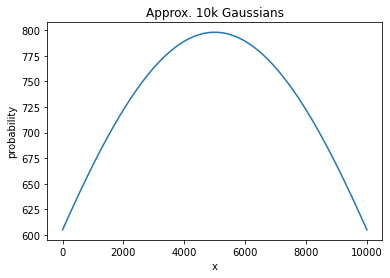

In [13]:
import numpy as np
from scipy.stats import norm
from scipy import stats

x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 10000)
g = norm.pdf(x, 0, 5)
gg= 10000* g 
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(gg)
ax.set_title('Approx. 10k Gaussians')
plt.xlabel('x')
plt.ylabel('probability')

# C. Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection

The integral from x to positive infinity can be converted to a sum.

In [14]:
normalizefactor=sum(gg[y] for y in range(len(gg)))
p=sum(gg[k]/normalizefactor for k in range(12, len(gg)))
print(p)

0.9990047955981497


In [15]:
stats.norm.ppf(p, loc=0, scale=1)

3.091659706127792

The significance of measurement 12.36 is 3.09 sigmas.

As the backgroud is convolved(summed) to a higher value, so does the signal, and the contrast btw signal and background would increase

# 4. A Calculate the signal required for a 5-sigma detection in Version 1

Using the number of sigmas times the value of sigma=5 gives the required detection level: 5*5=25

# B. Calculate the signal required for a 5-sigma detection in Version 2

The probability of getting a five-sigma point in a normal distribution is 

In [16]:
p=norm.sf(5,loc=0,scale=1)
print(p)

2.866515718791933e-07


We can do inverse integrations of the pdf of 10k Gaussians by finding the corresponding number of sigmas of the 10k Gaussian and then invert to find the signal level: 

In [26]:
sig=norm.ppf(p/10000,loc=0,scale=1)
print(sig)

-6.550537612705334


In [27]:
(1- norm.cdf(sig))*10000

9999.999999713347

# C. Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

In [28]:
9999.999999713347/25

399.9999999885339

The signal has to be ~400 times larger if I have a trials factor of 10k. The signal level does not scale as the trials factor because the number of sigmas of a 10k Gaussian pdf that corresponds to a 5-sigmas senstivity does not scale by 10k. The far tails of Gaussian have very little probability.

# D. If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

We can evaluate the change of the trials factor on the numbers of sigmas by plotting the change in 5-sigma sensitivity over the log of the scale factor.

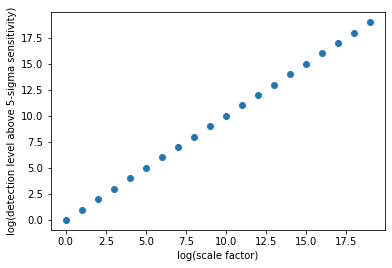

In [67]:
import numpy

#generate a list of scale factors
scales=list(10**i for i in range(20))

#find the signal level required for 5-sigma sensitivity
def findsig(scale):
    s=norm.ppf(p/scale,loc=0,scale=1)
    return (1- norm.cdf(s))*scale

y=findsig(scales)
plt.scatter(numpy.log10(scales),numpy.log10(y))
plt.xlabel('log(scale factor)')
plt.ylabel('log(detection level above 5-sigma sensitivity)')
plt.show()

The log-log plot between the scale factor and the 5-sigma signal level looks linear!

# Extra credit: If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? 

If the distribution is more spread out than Gaussian, the sensitivity penalty would be greater because the tails of the different distribution would account for more probability, so do when it scales. Vice versa. 